In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


from os import walk

import time
import datetime
%matplotlib inline

In [3]:
X_train = [[1,2,3,4,5,6],
           [1,3,4,5,6,7],
           [1,3,5,4,3,5],
           [2,1,3,4,4,6],
           [1,2,4,3,5,7],

           [5,7,8,9,9,10],
           [4,5,6,7,8,11],
           [5,6,7,8,9,12],
           [5,5,7,8,9,10],
           [6,5,7,8,9,9]]

In [4]:
y_train = [0,0,0,0,0,1,1,1,1,1]

In [5]:
X_test = [[1,3,4,3,5,6],
          [1,2,4,3,5,7],
          [1,2,3,5,4,6],
          [1,2,3,4,3,7],
         
          [4,5,6,7,8,12],
          [4,5,6,7,9,10],
          [5,4,7,8,9,10],
          [5,6,7,9,8,12]]

In [6]:
y_test = [0,0,0,0,1,1,1,1]

## Support Vector Machine

In [7]:
model = svm.SVC(kernel='linear', decision_function_shape='ovo')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
y_predict = model.predict(X_test)

In [8]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

In [9]:
y_test

[0, 0, 0, 0, 1, 1, 1, 1]

In [10]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

,0,1
0,4,0
1,0,4


In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



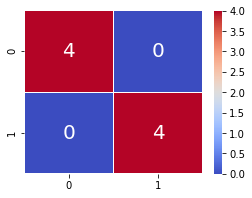

In [12]:
plt.figure(figsize=(4, 3))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Naive Bayes

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_predict = model.predict(X_test)

In [15]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

## Neural Network

In [8]:
model = Sequential()
model.add(Dense(6, activation='relu', kernel_initializer='he_normal', input_shape=(6,)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=3000, batch_size=64, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/3000
1/1 [==============================] - 0s 61ms/step - loss: 3.2784 - accuracy: 0.5000
Epoch 2/3000
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 67ms/step - loss: 3.2471 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 71ms/step - loss: 3.2159 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 68ms/step - loss: 3.1849 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 78ms/step - loss: 3.1542 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 60ms/step - loss: 3.1237 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 61ms/step - loss: 3.0935 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 61ms/step - loss: 3.0634 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 60ms/step - loss: 3.0336 - accuracy: 0.5000
Epoch 10/3000
1/1 [==================

1/1 [==============================] - 0s 67ms/step - loss: 1.4996 - accuracy: 0.5000
Epoch 81/3000
1/1 [==============================] - 0s 68ms/step - loss: 1.4850 - accuracy: 0.5000
Epoch 82/3000
1/1 [==============================] - 0s 67ms/step - loss: 1.4706 - accuracy: 0.5000
Epoch 83/3000
1/1 [==============================] - 0s 67ms/step - loss: 1.4563 - accuracy: 0.5000
Epoch 84/3000
1/1 [==============================] - 0s 68ms/step - loss: 1.4422 - accuracy: 0.5000
Epoch 85/3000
1/1 [==============================] - 0s 67ms/step - loss: 1.4282 - accuracy: 0.5000
Epoch 86/3000
1/1 [==============================] - 0s 67ms/step - loss: 1.4143 - accuracy: 0.5000
Epoch 87/3000
1/1 [==============================] - 0s 66ms/step - loss: 1.4006 - accuracy: 0.5000
Epoch 88/3000
1/1 [==============================] - 0s 68ms/step - loss: 1.3871 - accuracy: 0.5000
Epoch 89/3000
1/1 [==============================] - 0s 67ms/step - loss: 1.3736 - accuracy: 0.5000
Epoch 90/3000


1/1 [==============================] - 0s 68ms/step - loss: 0.7150 - accuracy: 0.5000
Epoch 162/3000
1/1 [==============================] - 0s 89ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 163/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 164/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.6955 - accuracy: 0.5000
Epoch 165/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.6890 - accuracy: 0.5000
Epoch 166/3000
1/1 [==============================] - 0s 87ms/step - loss: 0.6842 - accuracy: 0.5000
Epoch 167/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.6795 - accuracy: 0.5000
Epoch 168/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 169/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.6693 - accuracy: 0.5000
Epoch 170/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.6639 - accuracy: 0.5000
Ep

1/1 [==============================] - 0s 69ms/step - loss: 0.3936 - accuracy: 0.6000
Epoch 243/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3908 - accuracy: 0.6000
Epoch 244/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.3883 - accuracy: 0.6000
Epoch 245/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3862 - accuracy: 0.6000
Epoch 246/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3835 - accuracy: 0.6000
Epoch 247/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.3810 - accuracy: 0.6000
Epoch 248/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3789 - accuracy: 0.6000
Epoch 249/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3766 - accuracy: 0.6000
Epoch 250/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.3742 - accuracy: 0.6000
Epoch 251/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.3718 - accuracy: 0.6000
Ep

Epoch 323/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.2478 - accuracy: 1.0000
Epoch 324/3000
1/1 [==============================] - 0s 94ms/step - loss: 0.2465 - accuracy: 1.0000
Epoch 325/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.2457 - accuracy: 1.0000
Epoch 326/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.2447 - accuracy: 1.0000
Epoch 327/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.2435 - accuracy: 1.0000
Epoch 328/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.2422 - accuracy: 1.0000
Epoch 329/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.2407 - accuracy: 1.0000
Epoch 330/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.2392 - accuracy: 1.0000
Epoch 331/3000
1/1 [==============================] - 0s 142ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 332/3000
1/1 [==============================] - 0s 147ms/step - loss: 0.2365 - ac

1/1 [==============================] - 0s 60ms/step - loss: 0.1643 - accuracy: 1.0000
Epoch 404/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.1634 - accuracy: 1.0000
Epoch 405/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1626 - accuracy: 1.0000
Epoch 406/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1618 - accuracy: 1.0000
Epoch 407/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.1610 - accuracy: 1.0000
Epoch 408/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1601 - accuracy: 1.0000
Epoch 409/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1593 - accuracy: 1.0000
Epoch 410/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.1587 - accuracy: 1.0000
Epoch 411/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1577 - accuracy: 1.0000
Epoch 412/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.1570 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 94ms/step - loss: 0.1089 - accuracy: 1.0000
Epoch 485/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.1083 - accuracy: 1.0000
Epoch 486/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.1078 - accuracy: 1.0000
Epoch 487/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1073 - accuracy: 1.0000
Epoch 488/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.1068 - accuracy: 1.0000
Epoch 489/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1062 - accuracy: 1.0000
Epoch 490/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.1057 - accuracy: 1.0000
Epoch 491/3000
1/1 [==============================] - 0s 161ms/step - loss: 0.1052 - accuracy: 1.0000
Epoch 492/3000
1/1 [==============================] - 0s 105ms/step - loss: 0.1046 - accuracy: 1.0000
Epoch 493/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.1041 - accuracy: 1.0000
Epo

1/1 [==============================] - 0s 69ms/step - loss: 0.0733 - accuracy: 1.0000
Epoch 565/3000
1/1 [==============================] - 0s 113ms/step - loss: 0.0730 - accuracy: 1.0000
Epoch 566/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0726 - accuracy: 1.0000
Epoch 567/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0722 - accuracy: 1.0000
Epoch 568/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0716 - accuracy: 1.0000
Epoch 569/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0714 - accuracy: 1.0000
Epoch 570/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0712 - accuracy: 1.0000
Epoch 571/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0708 - accuracy: 1.0000
Epoch 572/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0703 - accuracy: 1.0000
Epoch 573/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0701 - accuracy: 1.0000
Ep

Epoch 645/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0503 - accuracy: 1.0000
Epoch 646/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0501 - accuracy: 1.0000
Epoch 647/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0500 - accuracy: 1.0000
Epoch 648/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.0497 - accuracy: 1.0000
Epoch 649/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0495 - accuracy: 1.0000
Epoch 650/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 651/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 652/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 653/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 654/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.0484 - acc

1/1 [==============================] - 0s 52ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 726/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.0357 - accuracy: 1.0000
Epoch 727/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0355 - accuracy: 1.0000
Epoch 728/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0354 - accuracy: 1.0000
Epoch 729/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0352 - accuracy: 1.0000
Epoch 730/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 731/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 732/3000
1/1 [==============================] - 0s 136ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 733/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0347 - accuracy: 1.0000
Epoch 734/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0346 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 49ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 806/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 807/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 808/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 809/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 810/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 811/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 812/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 813/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 814/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0254 - accuracy: 1.0000
Ep

Epoch 886/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 887/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 888/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0195 - accuracy: 1.0000
Epoch 889/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 890/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0194 - accuracy: 1.0000
Epoch 891/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 892/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 893/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 894/3000
1/1 [==============================] - 0s 146ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 895/3000
1/1 [==============================] - 0s 83ms/step - loss: 0.0191 - ac

1/1 [==============================] - 0s 68ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 967/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 968/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 969/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 970/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 971/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 972/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 973/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 974/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0148 - accuracy: 1.0000
Epoch 975/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0147 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 92ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 1047/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 1048/3000
1/1 [==============================] - 0s 103ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 1049/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 1050/3000
1/1 [==============================] - 0s 126ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 1051/3000
1/1 [==============================] - 0s 82ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 1052/3000
1/1 [==============================] - 0s 56ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 1053/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 1054/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 1055/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.0116 - accuracy:

1/1 [==============================] - 0s 52ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 1127/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 1128/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 1129/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 1130/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 1131/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 1132/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 1133/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 1134/3000
1/1 [==============================] - 0s 229ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 1135/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0093 - accuracy:

1/1 [==============================] - 0s 102ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 1207/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 1208/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 1209/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 1210/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 1211/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 1212/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 1213/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 1214/3000
1/1 [==============================] - 0s 154ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 1215/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0076 - accuracy

1/1 [==============================] - 0s 120ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1287/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1288/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1289/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1290/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 1291/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1292/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1293/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1294/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 1295/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0063 - accuracy: 

1/1 [==============================] - 0s 119ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 1367/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 1368/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1369/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1370/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1371/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1372/3000
1/1 [==============================] - 0s 185ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1373/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1374/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 1375/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0053 - accuracy:

1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1446/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1447/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1448/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1449/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1450/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1451/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1452/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1453/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 1454/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0045 - accuracy: 

1/1 [==============================] - 0s 111ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1526/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1527/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1528/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1529/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1532/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1533/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 1534/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0038 - accuracy:

1/1 [==============================] - 0s 101ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1606/3000
1/1 [==============================] - 0s 341ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1607/3000
1/1 [==============================] - 0s 116ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1608/3000
1/1 [==============================] - 0s 108ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1609/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1610/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1611/3000
1/1 [==============================] - 0s 52ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1612/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1613/3000
1/1 [==============================] - 0s 103ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 1614/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0033 - accurac

1/1 [==============================] - 0s 60ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1686/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1687/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1688/3000
1/1 [==============================] - 0s 49ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1689/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1694/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0028 - accuracy: 

1/1 [==============================] - 0s 137ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1766/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1767/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1768/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1769/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1770/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1771/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1772/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1773/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 1774/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0025 - accuracy:

1/1 [==============================] - 0s 68ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1846/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1847/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1848/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1849/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0022 - accuracy: 

1/1 [==============================] - 0s 140ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1926/3000
1/1 [==============================] - 0s 98ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1927/3000
1/1 [==============================] - 0s 97ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1928/3000
1/1 [==============================] - 0s 126ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1929/3000
1/1 [==============================] - 0s 85ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1930/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1931/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1932/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1933/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1934/3000
1/1 [==============================] - 0s 156ms/step - loss: 0.0020 - accuracy:

1/1 [==============================] - 0s 102ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2006/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2007/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2008/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2009/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2010/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2011/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - 0s 53ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0018 - accuracy:

1/1 [==============================] - 0s 100ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2086/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2087/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2088/3000
1/1 [==============================] - 0s 51ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2089/3000
1/1 [==============================] - 0s 92ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2090/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2091/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2092/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2093/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 2094/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0016 - accuracy: 1.

1/1 [==============================] - 0s 119ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2166/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2167/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2168/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2169/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2170/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2171/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2172/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2173/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0014 - accuracy:

1/1 [==============================] - 0s 116ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2246/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2247/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2248/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2249/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2250/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2251/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2252/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2253/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2254/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0013 - accuracy

1/1 [==============================] - 0s 110ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2325/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2326/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2327/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2328/3000
1/1 [==============================] - 0s 169ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2329/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2330/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2331/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2332/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2333/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0012 - accuracy

1/1 [==============================] - 0s 68ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2405/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2406/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2407/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2408/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2409/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2410/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2411/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2412/3000
1/1 [==============================] - 0s 101ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2413/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0010 - accuracy: 

1/1 [==============================] - 0s 52ms/step - loss: 9.6645e-04 - accuracy: 1.0000
Epoch 2484/3000
1/1 [==============================] - 0s 52ms/step - loss: 9.6526e-04 - accuracy: 1.0000
Epoch 2485/3000
1/1 [==============================] - 0s 102ms/step - loss: 9.6396e-04 - accuracy: 1.0000
Epoch 2486/3000
1/1 [==============================] - 0s 52ms/step - loss: 9.6322e-04 - accuracy: 1.0000
Epoch 2487/3000
1/1 [==============================] - 0s 51ms/step - loss: 9.6222e-04 - accuracy: 1.0000
Epoch 2488/3000
1/1 [==============================] - 0s 102ms/step - loss: 9.6071e-04 - accuracy: 1.0000
Epoch 2489/3000
1/1 [==============================] - 0s 52ms/step - loss: 9.5985e-04 - accuracy: 1.0000
Epoch 2490/3000
1/1 [==============================] - 0s 52ms/step - loss: 9.5888e-04 - accuracy: 1.0000
Epoch 2491/3000
1/1 [==============================] - 0s 110ms/step - loss: 9.5759e-04 - accuracy: 1.0000
Epoch 2492/3000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 67ms/step - loss: 8.8449e-04 - accuracy: 1.0000
Epoch 2561/3000
1/1 [==============================] - 0s 116ms/step - loss: 8.8371e-04 - accuracy: 1.0000
Epoch 2562/3000
1/1 [==============================] - 0s 68ms/step - loss: 8.8253e-04 - accuracy: 1.0000
Epoch 2563/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.8152e-04 - accuracy: 1.0000
Epoch 2564/3000
1/1 [==============================] - 0s 118ms/step - loss: 8.8079e-04 - accuracy: 1.0000
Epoch 2565/3000
1/1 [==============================] - 0s 69ms/step - loss: 8.7953e-04 - accuracy: 1.0000
Epoch 2566/3000
1/1 [==============================] - 0s 67ms/step - loss: 8.7885e-04 - accuracy: 1.0000
Epoch 2567/3000
1/1 [==============================] - 0s 118ms/step - loss: 8.7820e-04 - accuracy: 1.0000
Epoch 2568/3000
1/1 [==============================] - 0s 68ms/step - loss: 8.7702e-04 - accuracy: 1.0000
Epoch 2569/3000
1/1 [==============================] - 0s 6

1/1 [==============================] - 0s 68ms/step - loss: 8.1173e-04 - accuracy: 1.0000
Epoch 2638/3000
1/1 [==============================] - 0s 78ms/step - loss: 8.1105e-04 - accuracy: 1.0000
Epoch 2639/3000
1/1 [==============================] - 0s 120ms/step - loss: 8.1013e-04 - accuracy: 1.0000
Epoch 2640/3000
1/1 [==============================] - 0s 63ms/step - loss: 8.0906e-04 - accuracy: 1.0000
Epoch 2641/3000
1/1 [==============================] - 0s 63ms/step - loss: 8.0814e-04 - accuracy: 1.0000
Epoch 2642/3000
1/1 [==============================] - 0s 117ms/step - loss: 8.0727e-04 - accuracy: 1.0000
Epoch 2643/3000
1/1 [==============================] - 0s 95ms/step - loss: 8.0616e-04 - accuracy: 1.0000
Epoch 2644/3000
1/1 [==============================] - 0s 90ms/step - loss: 8.0566e-04 - accuracy: 1.0000
Epoch 2645/3000
1/1 [==============================] - 0s 150ms/step - loss: 8.0490e-04 - accuracy: 1.0000
Epoch 2646/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 70ms/step - loss: 7.4608e-04 - accuracy: 1.0000
Epoch 2715/3000
1/1 [==============================] - 0s 117ms/step - loss: 7.4544e-04 - accuracy: 1.0000
Epoch 2716/3000
1/1 [==============================] - 0s 69ms/step - loss: 7.4459e-04 - accuracy: 1.0000
Epoch 2717/3000
1/1 [==============================] - 0s 68ms/step - loss: 7.4366e-04 - accuracy: 1.0000
Epoch 2718/3000
1/1 [==============================] - 0s 119ms/step - loss: 7.4301e-04 - accuracy: 1.0000
Epoch 2719/3000
1/1 [==============================] - 0s 69ms/step - loss: 7.4218e-04 - accuracy: 1.0000
Epoch 2720/3000
1/1 [==============================] - 0s 68ms/step - loss: 7.4129e-04 - accuracy: 1.0000
Epoch 2721/3000
1/1 [==============================] - 0s 111ms/step - loss: 7.4037e-04 - accuracy: 1.0000
Epoch 2722/3000
1/1 [==============================] - 0s 68ms/step - loss: 7.3974e-04 - accuracy: 1.0000
Epoch 2723/3000
1/1 [==============================] - 0s 6

1/1 [==============================] - 0s 75ms/step - loss: 6.8757e-04 - accuracy: 1.0000
Epoch 2792/3000
1/1 [==============================] - 0s 71ms/step - loss: 6.8649e-04 - accuracy: 1.0000
Epoch 2793/3000
1/1 [==============================] - 0s 150ms/step - loss: 6.8592e-04 - accuracy: 1.0000
Epoch 2794/3000
1/1 [==============================] - ETA: 0s - loss: 6.8520e-04 - accuracy: 1.00 - 0s 95ms/step - loss: 6.8520e-04 - accuracy: 1.0000
Epoch 2795/3000
1/1 [==============================] - 0s 103ms/step - loss: 6.8435e-04 - accuracy: 1.0000
Epoch 2796/3000
1/1 [==============================] - 0s 114ms/step - loss: 6.8387e-04 - accuracy: 1.0000
Epoch 2797/3000
1/1 [==============================] - 0s 73ms/step - loss: 6.8318e-04 - accuracy: 1.0000
Epoch 2798/3000
1/1 [==============================] - 0s 123ms/step - loss: 6.8223e-04 - accuracy: 1.0000
Epoch 2799/3000
1/1 [==============================] - 0s 74ms/step - loss: 6.8164e-04 - accuracy: 1.0000
Epoch 2800/3

1/1 [==============================] - 0s 65ms/step - loss: 6.3484e-04 - accuracy: 1.0000
Epoch 2868/3000
1/1 [==============================] - 0s 68ms/step - loss: 6.3409e-04 - accuracy: 1.0000
Epoch 2869/3000
1/1 [==============================] - 0s 69ms/step - loss: 6.3352e-04 - accuracy: 1.0000
Epoch 2870/3000
1/1 [==============================] - 0s 69ms/step - loss: 6.3291e-04 - accuracy: 1.0000
Epoch 2871/3000
1/1 [==============================] - 0s 69ms/step - loss: 6.3215e-04 - accuracy: 1.0000
Epoch 2872/3000
1/1 [==============================] - 0s 70ms/step - loss: 6.3175e-04 - accuracy: 1.0000
Epoch 2873/3000
1/1 [==============================] - 0s 69ms/step - loss: 6.3107e-04 - accuracy: 1.0000
Epoch 2874/3000
1/1 [==============================] - 0s 69ms/step - loss: 6.3008e-04 - accuracy: 1.0000
Epoch 2875/3000
1/1 [==============================] - 0s 78ms/step - loss: 6.2978e-04 - accuracy: 1.0000
Epoch 2876/3000
1/1 [==============================] - 0s 60ms

1/1 [==============================] - 0s 101ms/step - loss: 5.8668e-04 - accuracy: 1.0000
Epoch 2945/3000
1/1 [==============================] - 0s 51ms/step - loss: 5.8607e-04 - accuracy: 1.0000
Epoch 2946/3000
1/1 [==============================] - 0s 52ms/step - loss: 5.8558e-04 - accuracy: 1.0000
Epoch 2947/3000
1/1 [==============================] - 0s 102ms/step - loss: 5.8507e-04 - accuracy: 1.0000
Epoch 2948/3000
1/1 [==============================] - 0s 51ms/step - loss: 5.8435e-04 - accuracy: 1.0000
Epoch 2949/3000
1/1 [==============================] - 0s 52ms/step - loss: 5.8367e-04 - accuracy: 1.0000
Epoch 2950/3000
1/1 [==============================] - 0s 110ms/step - loss: 5.8303e-04 - accuracy: 1.0000
Epoch 2951/3000
1/1 [==============================] - 0s 61ms/step - loss: 5.8255e-04 - accuracy: 1.0000
Epoch 2952/3000
1/1 [==============================] - 0s 50ms/step - loss: 5.8202e-04 - accuracy: 1.0000
Epoch 2953/3000
1/1 [==============================] - 0s 1

In [13]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19412), started 0:00:58 ago. (Use '!kill 19412' to kill it.)

In [11]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 1.0000


In [12]:
acc

1.0

In [13]:
y_predict = model.predict(X_test)
y_predict

array([[1.2708630e-04],
       [3.9464849e-06],
       [1.9081599e-05],
       [1.4872411e-05],
       [8.5220945e-01],
       [8.9812350e-01],
       [8.5205883e-01],
       [8.3184862e-01]], dtype=float32)

In [28]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Test Data of the Book

In [15]:
from sklearn.datasets import load_iris

In [16]:
data = load_iris()

In [18]:
len(data)

6

In [20]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  